<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_HW_08_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EQE 358- Métodos Numéricos Aplicados a Processos Químicos
##Lista de Exercícios 08 – Entrega 01/11/2023
###Prof. Pedro Constantino



---

## Problema 1

---



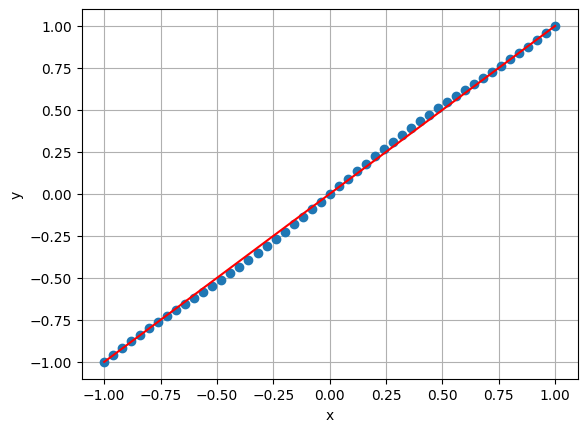

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir e discretizar o espaço
n = 51
xL = -1
xR = 1
x = np.linspace(xL,xR,n)
dx = (xR-xL)/(n-1)

# Tolerância e chute inicial de Newton-Raphson
tol = 1e-4
y = x

def getR(y):

    # Inicializar o vetor de Resíduos
    n = len(y)
    Res = np.zeros(n)

    # Definir a primeira equação do sistema
    Res[0]= y[0]+1
    for i in range(1,n-1):
        Res[i] = (y[i+1]-2*y[i]+y[i-1])+(2*y[i]*(1-2*y[i]**2))*(dx**2)
    # Definir a última equação do sistema.
    Res[n-1]= y[n-1]-1

    return Res

def getJ(y):

    # Inicializar a Matriz Jacobiana
    n = len(y)
    Jac = np.zeros((n,n))

    # Definir o primeiro elemento do Jacobiano
    Jac[0,0]= 1
    # Definir os elementos das diagonais do Jacobiano
    for i in range(1,n-1):
        Jac[i,i-1]= 1
        Jac[i,i] =-2+(2-6*y[i]**2)*(dx**2)
        Jac[i,i+1]= 1
    # Definir o último elemento do Jacobiano
    Jac[n-1,n-1]= 1

    return Jac

def nonlinear_newton_raphson(x, tol):
    # x = chute inicial para x
    # tol = critério de convergência
    # Requer a função R = getR(x), que calcula o vetor de Resíduos
    # Requer a função J = getJ(x), que calcula a matriz Jacobiana

    R = getR(x)
    k = 0       # Contador de iterações
    kmax = 100  # Número máximo de iterações permitidas

    while np.linalg.norm(R) > tol:
        J = getJ(x)                     # Calcular a Jacobiana
        del_x = -np.linalg.solve(J, R)  # Resolver o Sistema Linear
        x = x + del_x                   # Atualizar x, Newton Raphson

        k = k + 1  # atualizar contador
        R = getR(x)  # R para o loop while e contador

        if k > kmax:
            print('Não convergiu.')
            break

    return x

y = nonlinear_newton_raphson(x, tol)

plt.plot(x,y,'o',x,x,'-r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()



---

## Problema 2

---



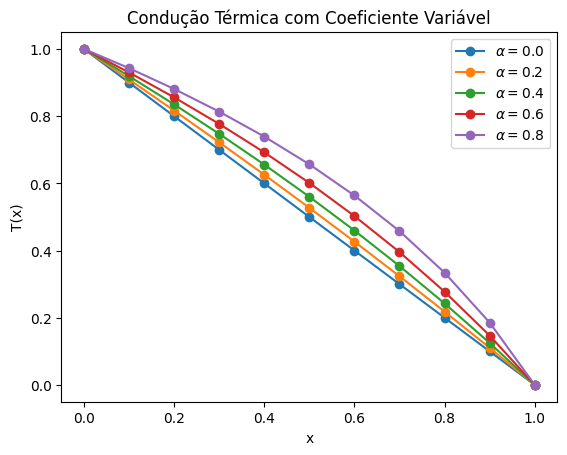

In [ ]:
import numpy as np
from numpy import linalg as lp
import matplotlib.pyplot as plt

# Discretizar o espaço
n = 11
x = np.linspace(0,1,n)
dx = 1/(n-1)

# Definir parâmetros do modelo
k0 = 0.2

plt.figure()

for k in range(1,6):
    a = k0*(k-1)

    # Inicializar variáveis
    A = np.zeros((n,n))
    b =np.zeros(n)

    # Condição de contorno x=0
    A[0,0]=1
    b[0]=1

    # Nós interiores
    for i in range(1,n-1):
        xi = (i-1)*dx
        A[i,i-1] = (1-a*xi)/(dx**2)+a/(2*dx)
        A[i,i] = 2*(a*xi-1)/(dx**2)
        A[i,i+1] = (1-a*xi)/(dx**2)-a/(2*dx)

    # Condição de contorno x=1
    A[n-1,n-1]=1
    b[n-1]=0

    # Resolver o sistema linear
    T = lp.solve(A,b)

    # Plotar os resultados
    plt.plot(x,T,'o-')

plt.xlabel('x')
plt.ylabel('T(x)')
plt.title('Condução Térmica com Coeficiente Variável')
plt.legend([r'$\alpha=0.0$',r'$\alpha=0.2$',r'$\alpha=0.4$',r'$\alpha=0.6$',r'$\alpha=0.8$'])
plt.show()



---

## Problema 3

---



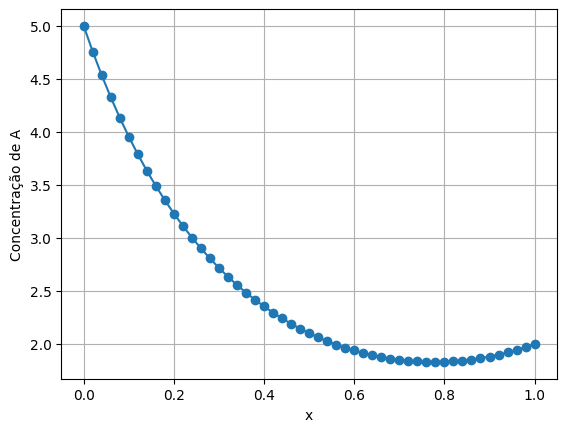

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = 2
D = 1

# Definir e discretizar o espaço
n = 51
xL = 0
xR = 1
x = np.linspace(xL,xR,n)
dx = (xR-xL)/(n-1)

# Tolerância e chute inicial de Newton-Raphson
tol = 1e-4
y = x

def getR(y):

    # Inicializar o vetor de Resíduos
    n = len(y)
    Res = np.zeros(n)

    # Definir a primeira equação do sistema
    Res[0]= y[0]-5
    for i in range(1,n-1):
        Res[i] = (y[i+1]-2*y[i]+y[i-1])-((k*dx**2)/D)*y[i]**2
    # Definir a última equação do sistema.
    Res[n-1]= y[n-1]-2

    return Res

def getJ(y):

    # Inicializar a Matriz Jacobiana
    n = len(y)
    Jac = np.zeros((n,n))

    # Definir o primeiro elemento do Jacobiano
    Jac[0,0]= 1
    # Definir os elementos das diagonais do Jacobiano
    for i in range(1,n-1):
        Jac[i,i-1]= 1
        Jac[i,i] =-2-2*((k*dx**2)/D)*y[i]
        Jac[i,i+1]= 1
    # Definir o último elemento do Jacobiano
    Jac[n-1,n-1]= 1

    return Jac

y = nonlinear_newton_raphson(x, tol)

plt.plot(x,y,'o-')
plt.xlabel('x')
plt.ylabel('Concentração de A')
plt.grid()
plt.show()



---

## Problema 4

---



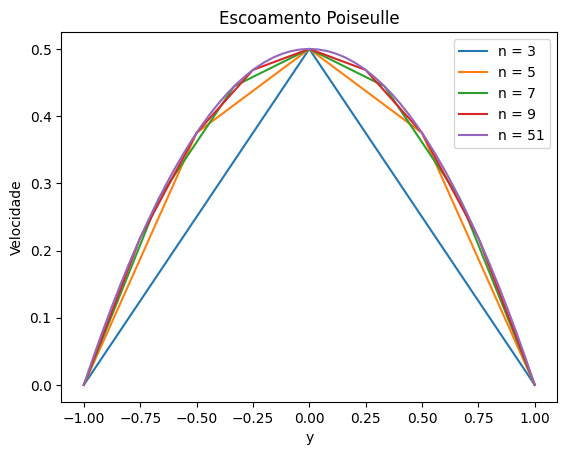

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir os parâmetros do problema
dP = -1
L = 1
H = 1
mu = 1

def poiseuille(n):
    # Definir o delta y
    dy = 2*H/(n-1)

    # Inicializar matrizes e vetores
    A = np.zeros((n,n))
    b = np.zeros(n)
    v = np.zeros(n)
    y = np.linspace(-H,H,n)

    # Condição de Contorno 1
    A[0,0] = 1
    b[0] = 0

    # Pontos Interiores
    for i in range(1,n-1):
        A[i,i-1] = 1
        A[i,i]   = -2
        A[i,i+1] = 1

        b[i] = (dP/L)*(dy**2)/mu

    # Condição de Contorno 2
    A[n-1,n-1]=1
    b[n-1] = 0

    # Resolver o sistema linear
    v = np.linalg.solve(A,b)
    return y,v

# Fazer um loop para resolver diversas malhas
for n in [3,5,7,9,51]:
    y, v = poiseuille(n)
    plt.plot(y,v,label=f'n = {n}')

plt.xlabel('y')
plt.ylabel('Velocidade')
plt.title('Escoamento Poiseulle')
plt.legend()
plt.show()



---

## Problema 5

---



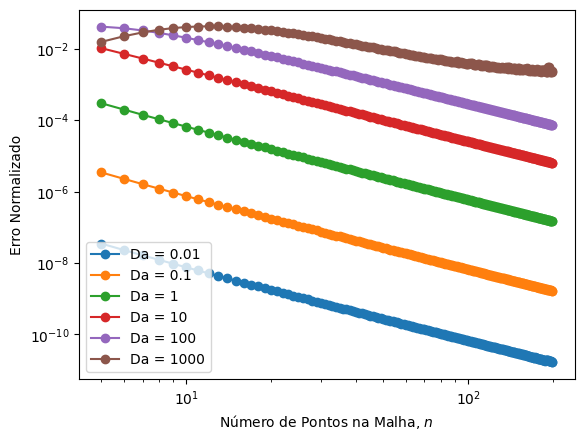

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lp

def calcular_exata(n,Da):
    x = np.linspace(0,1,n)
    Da2 = np.sqrt(Da)
    out = np.cosh(Da2*x)-np.cosh(Da2)*np.sinh(Da2*x)/np.sinh(Da2)
    return out

def calcular_erro(n,Da):
    dx = 1/(n-1)

    A = np.zeros((n,n))
    b = np.zeros(n)
    c = np.zeros(n)

    # Condição de contorno i=1
    A[0,0] = 1
    b[0]   = 1

    # Pontos interiores i=2,...,n-1
    for i in range(1,n-1):
        A[i,i-1] = 1
        A[i,i]   = -2 -Da*dx*dx
        A[i,i+1] = 1

    # Condição de contorno i=n
    A[n-1,n-1] = 1
    b[n-1]     = 0

    # Resolver o sistema linear
    c = lp.solve(A,b)

    # Calcular a solução exata
    cexata = calcular_exata(n,Da)

    # Calcular o erro
    out = lp.norm(c-cexata)/lp.norm(cexata)

    return out

n_vetor = np.zeros(195)
erro = np.zeros((195,6))
cexato = np.zeros((1000,6))

for i in range(0,6):
    Da = 10**(i-2)
    for n in range(5,200):
        n_vetor[n-5] = n
        erro[n-5,i] = calcular_erro(n,Da)
    cexato[:,i] = calcular_exata(1000,Da)

plt.figure
plt.loglog(n_vetor,erro,'-o')
plt.xlabel('Número de Pontos na Malha, $n$')
plt.ylabel('Erro Normalizado')
plt.legend(['Da = 0.01','Da = 0.1','Da = 1','Da = 10','Da = 100','Da = 1000'])
plt.show()

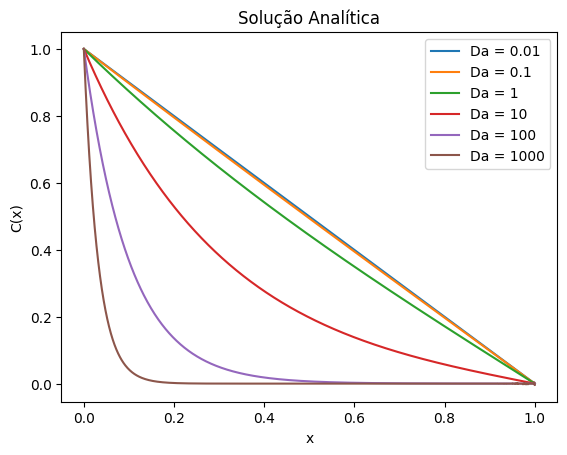

In [ ]:
x = np.linspace(0,1,1000)

plt.figure()
plt.plot(x,cexato,'-')
plt.title('Solução Analítica')
plt.xlabel('x')
plt.ylabel('C(x)')
plt.legend(['Da = 0.01','Da = 0.1','Da = 1','Da = 10','Da = 100','Da = 1000'])
plt.show()